<a href="https://colab.research.google.com/github/kiet1043/AI-homeworks/blob/main/HANDPALM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [6]:
training=train_data.flow_from_directory('/content/drive/MyDrive/Data_AI/handpalm_train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1332 images belonging to 10 classes.


In [7]:
training.class_indices

{'0': 0,
 '1': 1,
 '12': 2,
 '123': 3,
 '1234': 4,
 '13': 5,
 '23': 6,
 '234': 7,
 '24': 8,
 '4': 9}

In [8]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))

#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [9]:
train=model.fit(training,epochs=20,batch_size=128,verbose=1)

Epoch 1/20
42/42 [==============================] - 922s 22s/step - loss: 2.1280 - accuracy: 0.2643
Epoch 2/20
42/42 [==============================] - 126s 3s/step - loss: 1.6924 - accuracy: 0.3896
Epoch 3/20
42/42 [==============================] - 124s 3s/step - loss: 1.2095 - accuracy: 0.5728
Epoch 4/20
42/42 [==============================] - 125s 3s/step - loss: 0.8510 - accuracy: 0.7140
Epoch 5/20
42/42 [==============================] - 125s 3s/step - loss: 0.6557 - accuracy: 0.7740
Epoch 6/20
42/42 [==============================] - 124s 3s/step - loss: 0.5086 - accuracy: 0.8281
Epoch 7/20
42/42 [==============================] - 125s 3s/step - loss: 0.3797 - accuracy: 0.8679
Epoch 8/20
42/42 [==============================] - 126s 3s/step - loss: 0.3454 - accuracy: 0.8799
Epoch 9/20
42/42 [==============================] - 127s 3s/step - loss: 0.3099 - accuracy: 0.8934
Epoch 10/20
42/42 [==============================] - 125s 3s/step - loss: 0.1871 - accuracy: 0.9414
Epoch 11

In [10]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0741577222943306
Train Accuracy 0.9729729890823364


In [11]:
# Lưu 
model.save("/content/drive/MyDrive/Data_AI/HandPalm.h5")

1/1 [==============================] - 0s 20ms/step
có trí tuệ, sinh mệnh và sự nghiệp tốt


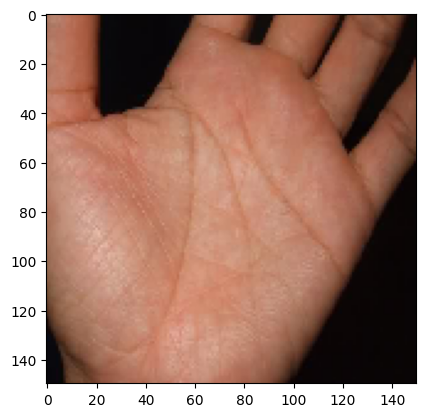

1/1 [==============================] - 0s 21ms/step
có tình duyên, trí tuệ và sinh mệnh tốt


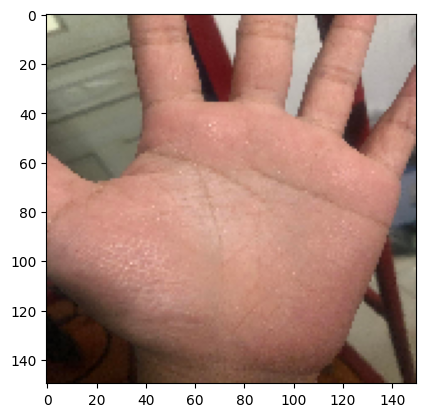

1/1 [==============================] - 0s 20ms/step
có tình duyên, trí tuệ và sinh mệnh tốt


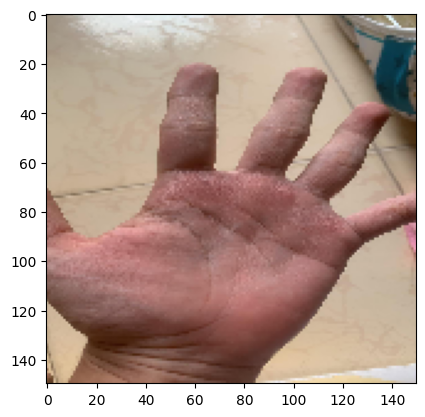

1/1 [==============================] - 0s 24ms/step
có trí tuệ và sinh mệnh tốt


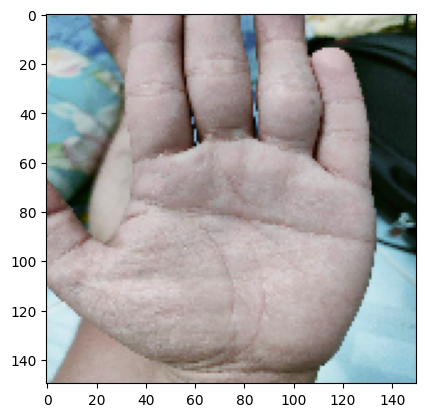

1/1 [==============================] - 0s 22ms/step
có trí tuệ, sinh mệnh và sự nghiệp tốt


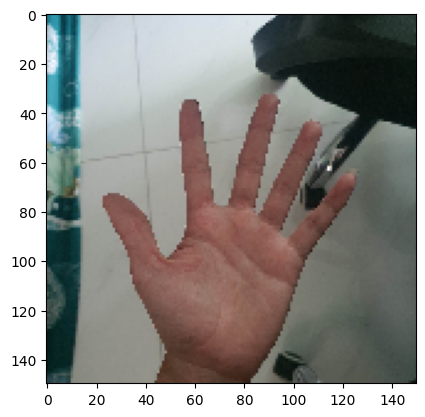

In [14]:
folder="/content/drive/MyDrive/Data_AI/handpalm_test/"

for i in os.listdir(folder):
  img=load_img(folder+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model.predict(img).argmax())
  class_name=['không có gì tốt cả','có tình duyên tốt','có tình duyên và trí tuệ tốt','có tình duyên, trí tuệ và sinh mệnh tốt',
              'có cả tình duyên, sinh mệnh, trí tuệ, sự nghiệp đều tốt','có tình duyên và sinh mệnh tốt','có trí tuệ và sinh mệnh tốt',
              'có trí tuệ, sinh mệnh và sự nghiệp tốt','có trí tuệ và sự nghiệp tốt','có sự nghiệp tốt']
  print(class_name[result])
  plt.show()

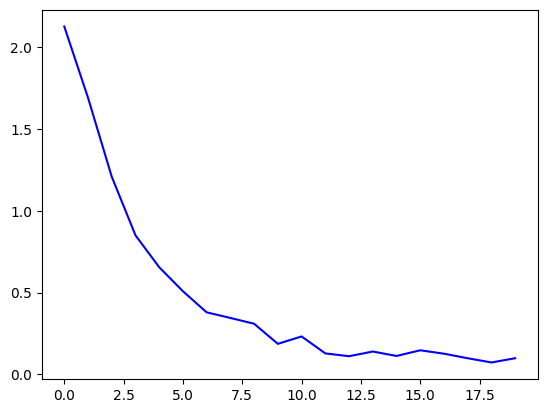

In [13]:
#Vẽ biểu đồ thể hiện sự mất mát qua số lần train
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()     